In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import datetime as dt

In [4]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\supply_chain_data.csv')
df.head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [7]:
df.shape
print('Number of Rows',df.shape[0])
print('Number of Columns',df.shape[1])

Number of Rows 100
Number of Columns 24


In [8]:
df.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

In [9]:
df.describe

<bound method NDFrame.describe of    Product type    SKU      Price  Availability  Number of products sold  \
0      haircare   SKU0  69.808006            55                      802   
1      skincare   SKU1  14.843523            95                      736   
2      haircare   SKU2  11.319683            34                        8   
3      skincare   SKU3  61.163343            68                       83   
4      skincare   SKU4   4.805496            26                      871   
..          ...    ...        ...           ...                      ...   
95     haircare  SKU95  77.903927            65                      672   
96    cosmetics  SKU96  24.423131            29                      324   
97     haircare  SKU97   3.526111            56                       62   
98     skincare  SKU98  19.754605            43                      913   
99     haircare  SKU99  68.517833            17                      627   

    Revenue generated Customer demographics  Stock le

In [10]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [12]:
df.drop_duplicates()
df.head(3)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282


### Top Selling Products

In [18]:
df.groupby(['Product type'],as_index=False)['Number of products sold'].count().sort_values(by=['Product type'],ascending=False)

,Product type,Number of products sold
2,skincare,40
1,haircare,34
0,cosmetics,26


### Top Revenue Generators

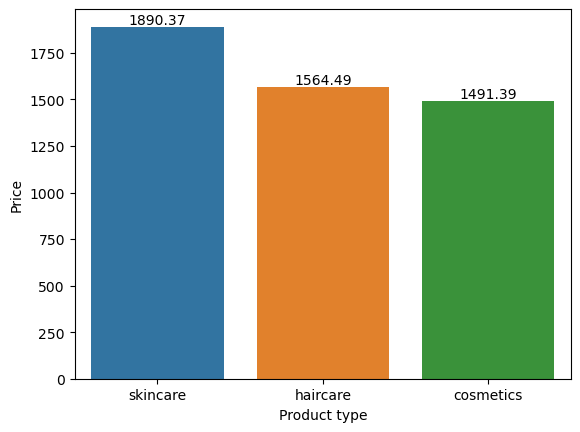

In [95]:
b=df.groupby(['Product type'],as_index=False)['Price'].sum().sort_values(by=['Product type'],ascending=False)
b
ax = sbn.barplot(x='Product type', y='Price', data=b)

# 2. Add labels using the 'ax' variable
ax.bar_label(ax.containers[0])

# 3. Show the plot
plt.show()

### Top Customers are from...

In [39]:
c=df.groupby(['Location'],as_index=False)['Number of products sold'].sum().sort_values(by=['Number of products sold'],ascending=False)
c

,Location,Number of products sold
3,Kolkata,12770
2,Delhi,9715
4,Mumbai,9426
1,Chennai,8768
0,Bangalore,5420


### Top Revenue Generating Location

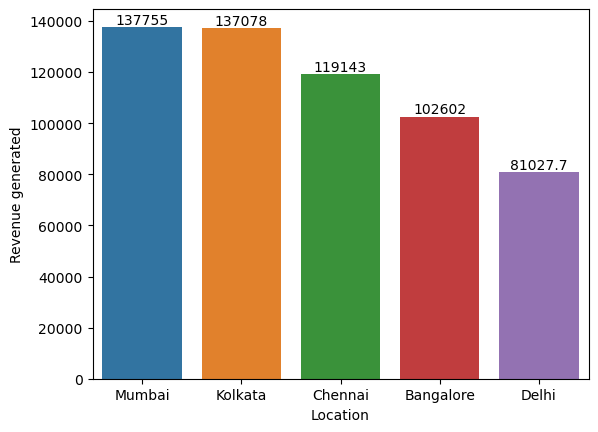

In [94]:
ax = sbn.barplot(x='Location', y='Revenue generated', data=a)


ax.bar_label(ax.containers[0])

plt.show()

### Male OR Female

In [98]:
df.groupby(['Customer demographics'],as_index=False)['Revenue generated'].count().sort_values(by=['Customer demographics'],ascending=False)

,Customer demographics,Revenue generated
3,Unknown,31
2,Non-binary,23
1,Male,21
0,Female,25


### Orders v/s Availability

<Axes: xlabel='Product type', ylabel='Availability'>

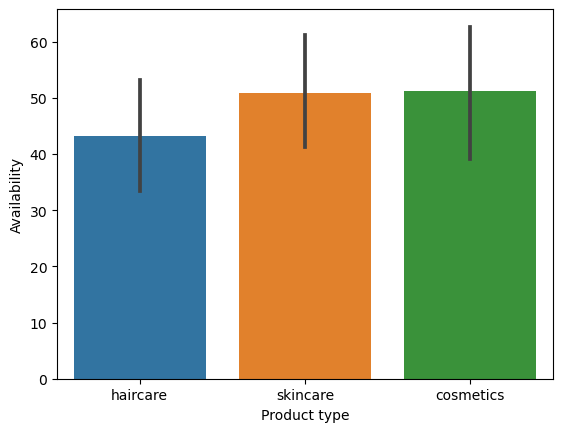

In [117]:

sbn.barplot(data=df,x='Product type',y='Availability')

# SUMMARY

### Recommendations

Thank you